Louie Balderrama<br>
Springboard Data Science Career Track, January 2019 cohort<br>

<h1 align="center"> In-Depth Analysis </h1>

### Machine Learning ###
To get our model to work, we perform one-hot encoding on the categorical features of our `df` dataframe. This stretches our categorical columns so we have one column per category. But before this, we explicitly specify which of the features will be treated as discrete – this is because we have columns that *appear* continuous because they are numerical, like `zipcode`. Converting to `category` type also helps make the computations faster.

We assign our `X` and `y` variables based on the `new_df` – the modified `df` where *get dummies* was applied. We predict the `y` – our `price` – given the `X` features.

We make use of different supervised machine learning approaches to find out what *default* estimator works most effectively without tuning. Once that's been figured out, we can then perform hyperparameter tuning. The metric used is the mean `R2` for accuracy over 5-fold cross-validation.

The training will be done on 70% of the data. The remaining 30% will be our hold-out set that will be left untouched until the final model has been selected and tuned.

In [79]:
categories = ["zipcode", "host_is_superhost", "host_verifications_count", \
              "host_identity_verified", "property_type (simple)", "room_type", \
              "cancellation_policy", "Private Entry", "Family-friendly", \
              "Pets OK", "Self Check-in", "Balcony", "minimum_nights"]
for category in categories:
    df[category] = df[category].astype("category")

new_df = pd.get_dummies(df, drop_first=True)

X = new_df.drop(columns=["id", "price"])
y = np.log(new_df[["price"]])

### Linear Regression ###

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

cross_val_scores= cross_val_score(reg, X_train, y_train, \
                                  cv=5, scoring="r2")*100
scores = {}
scores["Linear Regression"] = np.mean(cross_val_scores)

print("Linear Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Linear Regression"])

Linear Regression Cross-Validation Scores:
59.80%
55.36%
60.76%
58.47%
57.42%
Average Score on 5-Folds: 58.36%


### Ridge Regression ###

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)

cross_val_scores = cross_val_score(ridge, X_train, y_train, \
                                   cv=5, scoring="r2")*100
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Ridge Regression"])

Ridge Regression Cross-Validation Scores:
59.87%
55.45%
60.75%
58.49%
57.52%
Average Score on 5-Folds: 58.42%


### Lasso Regression ###

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

cross_val_scores = cross_val_score(lasso, X_train, y_train, \
                                   cv=5, scoring="r2")*100
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Lasso Regression"])

#ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.
#Fitting data with very small alpha may cause precision problems.

Lasso Regression Cross-Validation Scores:
30.72%
27.90%
29.62%
31.58%
30.74%
Average Score on 5-Folds: 30.11%


### Decision Tree ###

In [83]:
from sklearn import tree

trees = tree.DecisionTreeRegressor(max_depth=6, random_state=42)
trees.fit(X_train, y_train)

cross_val_scores = cross_val_score(trees, X_train, y_train, \
                                   cv=5, scoring="r2")*100
scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
51.53%
52.58%
53.62%
51.92%
53.79%
Average Score on 5-Folds: 52.69%


### Bagging Regressor ###

In [84]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(base_estimator=trees, \
                       random_state=42)
bag.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(bag, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["Bagging Tree"] = np.mean(cross_val_scores)

print("Bagging Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Bagging Tree"])

Bagging Tree Cross-Validation Scores:
57.55%
57.52%
58.03%
57.84%
57.94%
Average Score on 5-Folds: 57.78%


### Random Forest ###

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(forest, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["Random Forest"] = np.mean(cross_val_scores)

print("Random Forest Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Random Forest"])

Random Forest Cross-Validation Scores:
61.85%
56.79%
62.25%
60.52%
59.99%
Average Score on 5-Folds: 60.28%


### Adaptive Boost Regressor ###

In [86]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator=trees, random_state=42)
ada.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(ada, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["AdaBoost"] = np.mean(cross_val_scores)

print("AdaBoost Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["AdaBoost"])

AdaBoost Cross-Validation Scores:
58.18%
54.41%
58.30%
53.91%
56.73%
Average Score on 5-Folds: 56.30%


### Gradient Boost Regressor ###

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(gbr, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["Gradient Boost"] = np.mean(cross_val_scores)

print("Gradient Boost Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Gradient Boost"])

Gradient Boost Cross-Validation Scores:
65.38%
64.05%
65.52%
64.31%
63.35%
Average Score on 5-Folds: 64.52%


### Support Vector Machine ###

In [88]:
from sklearn.svm import SVR

SVC = SVR(kernel="rbf")
SVC.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(SVC, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["Support Vector"] = np.mean(cross_val_scores)

print("Support Vector Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Support Vector"])

Support Vector Cross-Validation Scores:
51.99%
50.20%
53.93%
53.48%
51.39%
Average Score on 5-Folds: 52.20%


### Basic Neural Network ###

In [89]:
from sklearn.neural_network import MLPRegressor

nets = MLPRegressor(random_state=42)
nets.fit(X_train, np.ravel(y_train))

cross_val_scores = cross_val_score(nets, X_train, \
                                   np.ravel(y_train), \
                                   cv=5, scoring="r2")*100
scores["Neural Network"] = np.mean(cross_val_scores)

print("Neural Network Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Neural Network"])

Neural Network Cross-Validation Scores:
47.05%
25.10%
45.86%
44.14%
52.64%
Average Score on 5-Folds: 42.96%


### Default Estimator Scores ###
Below are the average 5-fold cross-validation scores for the different default estimators. The ensemble approaches give the best scores. Gradient Boost Regression fared well with **64.52%** *without* any tuning.

In [90]:
scores = sorted(scores.items(), key=lambda score: \
                score[1], reverse=True)

for i in range(len(scores)):
    print("%s: %.2f%%" % \
          (scores[i][0], scores[i][1]))

Gradient Boost: 64.52%
Random Forest: 60.28%
Ridge Regression: 58.42%
Linear Regression: 58.36%
Bagging Tree: 57.78%
AdaBoost: 56.30%
Decision Tree: 52.69%
Support Vector: 52.20%
Neural Network: 42.96%
Lasso Regression: 30.11%


We now take the top models and tune them and see how much more the scores can be improved. For every approach, a heatmap is used to depict how each pair of parameters influence the accuracy of the model. We'll take a look at a diverse set of estimators: a *linear regression* approach, a *random forest* approach, and a *boosting* approach.

### Tuned Ridge Regression ###

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

steps = [("scale", StandardScaler()), ("ridge", Ridge(random_state=42))]

pipeline = Pipeline(steps)

params = {"ridge__alpha":[20, 25, 50, 100, \
                          200, 500, 1000], \
          "ridge__solver":["auto", "lsqr", "svd", "saga"]}

cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="r2")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = cv.best_score_*100

print("Best parameters:\n---------------")
for key, value in cv_param.items():
    print("%s: %s" % (key, str(value)))
print("\nBest score: %.2f%%" % cv_score)

Best parameters:
---------------
ridge__alpha: 100
ridge__solver: svd

Best score: 58.41%


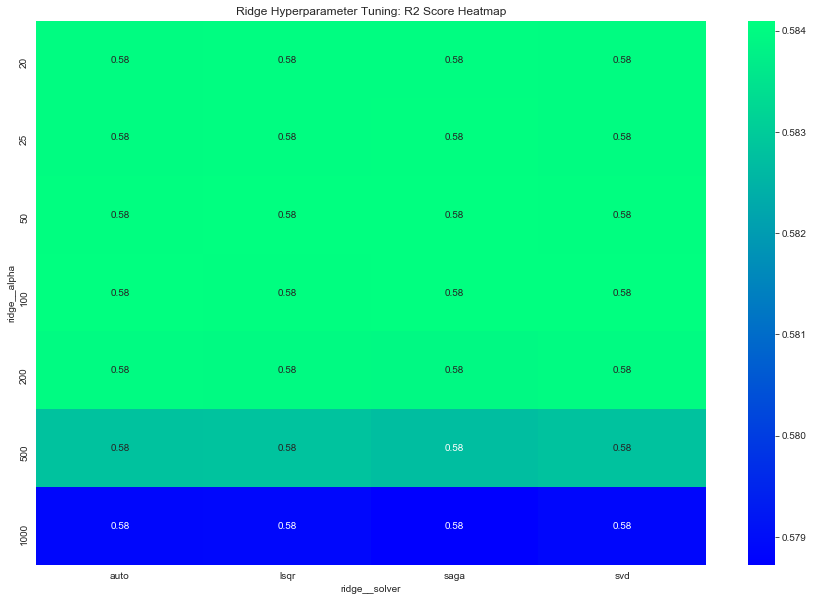

In [92]:
cv_df = pd.DataFrame(cv.cv_results_["params"])
cv_df["mean_train_score"] = cv.cv_results_["mean_test_score"]

cv_ind = cv_df.columns[0]
cv_col = cv_df.columns[1]
cv_val = cv_df.columns[2]

cv_df = cv_df.pivot(index=cv_ind, columns=cv_col, values=cv_val)

f, axes = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_df, annot=True, cmap="winter")
ax.set(title="Ridge Hyperparameter Tuning: R2 Score Heatmap")
plt.show()

### Tuned Random Forest ###

In [93]:
steps = [("forest", RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

params = {"forest__n_estimators": [1, 5, 10, 50, 100, 200], \
          "forest__max_depth": [3, 5, 7]}
 
cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="r2")
cv.fit(X_train, np.ravel(y_train))

cv_param = cv.best_params_
cv_score = cv.best_score_*100

print("Best parameters:\n---------------")
for key, value in cv_param.items():
    print("%s: %d" % (key, value))
print("\nBest score: %.2f%%" % cv_score)

Best parameters:
---------------
forest__max_depth: 7
forest__n_estimators: 200

Best score: 60.10%


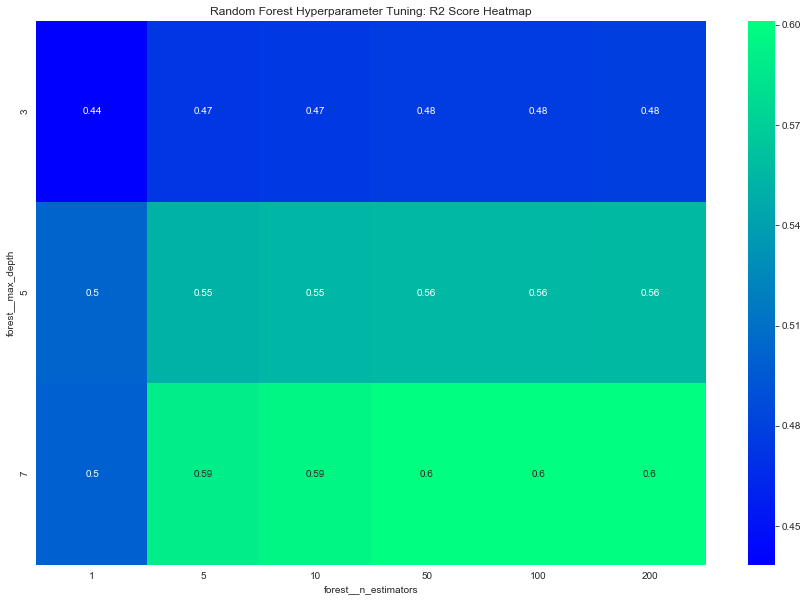

In [94]:
cv_df = pd.DataFrame(cv.cv_results_["params"])
cv_df["mean_train_score"] = cv.cv_results_["mean_test_score"]

cv_ind = cv_df.columns[0]
cv_col = cv_df.columns[1]
cv_val = cv_df.columns[2]

cv_df = cv_df.pivot(index=cv_ind, columns=cv_col, values=cv_val)

f, axes = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_df, annot=True, cmap="winter")
ax.set(title="Random Forest Hyperparameter Tuning: R2 Score Heatmap")
plt.show()

### Tuned Gradient Boosting Regression ###

In [95]:
steps = [("GBR", GradientBoostingRegressor(random_state=42, \
                                           loss="huber"))]

pipeline = Pipeline(steps)

params = {"GBR__n_estimators":[100, 200, 500, 1000], \
          "GBR__max_depth":[3, 5, 7, 10]}

cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="r2")
cv.fit(X_train, np.ravel(y_train))

cv_param = cv.best_params_
cv_score = cv.best_score_*100

print("Best parameters:\n---------------")
for key, value in cv_param.items():
    print("%s: %d" % (key, value))
print("\nBest score: %.2f%%" % cv_score)

Best parameters:
---------------
GBR__max_depth: 3
GBR__n_estimators: 500

Best score: 66.44%


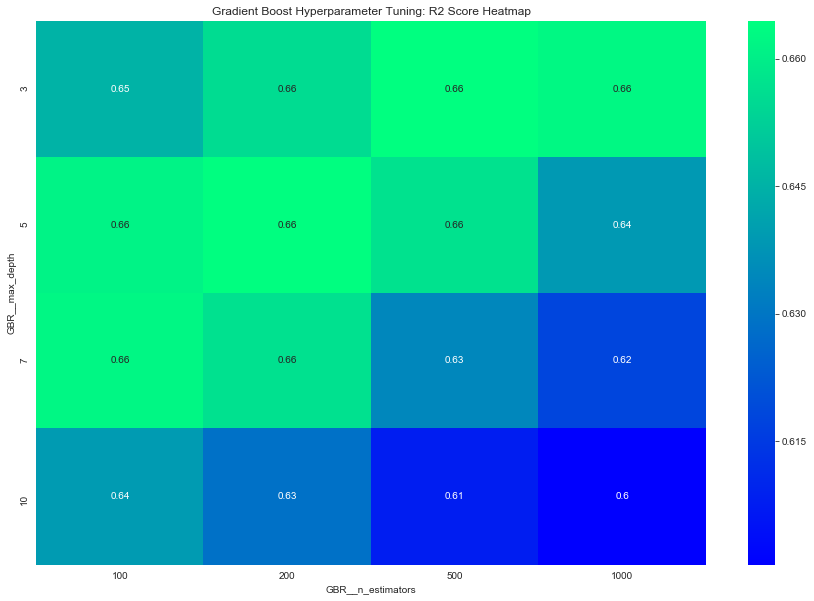

In [96]:
cv_df = pd.DataFrame(cv.cv_results_["params"])
cv_df["mean_train_score"] = cv.cv_results_["mean_test_score"]

cv_ind = cv_df.columns[0]
cv_col = cv_df.columns[1]
cv_val = cv_df.columns[2]

cv_df = cv_df.pivot(index=cv_ind, columns=cv_col, values=cv_val)

f, axes = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_df, annot=True, cmap="winter")
ax.set(title="Gradient Boost Hyperparameter Tuning: R2 Score Heatmap")
plt.show()

### Feature Importance ###
The Gradient Boost approach gave the highest accuracy overall on the training set. But that's if we are to make use of *all* the features as they are. We can further improve the model by taking *feature importance* into account. Below, we use Mutual Information (MI) as a scoring method to *rank* each feature.

Note that the original dataset had only 25 features but because of one-hot encoding, the feature count expanded to 93.

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

kbest = SelectKBest(score_func=mutual_info_regression, k=5)
kbest.fit(X, y)

feature_names = X.columns
feature_scores = list(zip(feature_names, kbest.scores_))

feature_scores.sort(key=lambda x:x[1], reverse=True)

for item in feature_scores[:10]:
    print("Score of \"%s\": %.3f" % \
          (item[0], item[1]))

Score of "accommodates": 0.325
Score of "room_type_Private room": 0.174
Score of "guests_included": 0.174
Score of "Auto Theft": 0.145
Score of "Burglary": 0.144
Score of "Total No. of Crimes": 0.143
Score of "Aggravated Assault": 0.141
Score of "Theft": 0.141
Score of "Robbery": 0.138
Score of "extra_people": 0.126


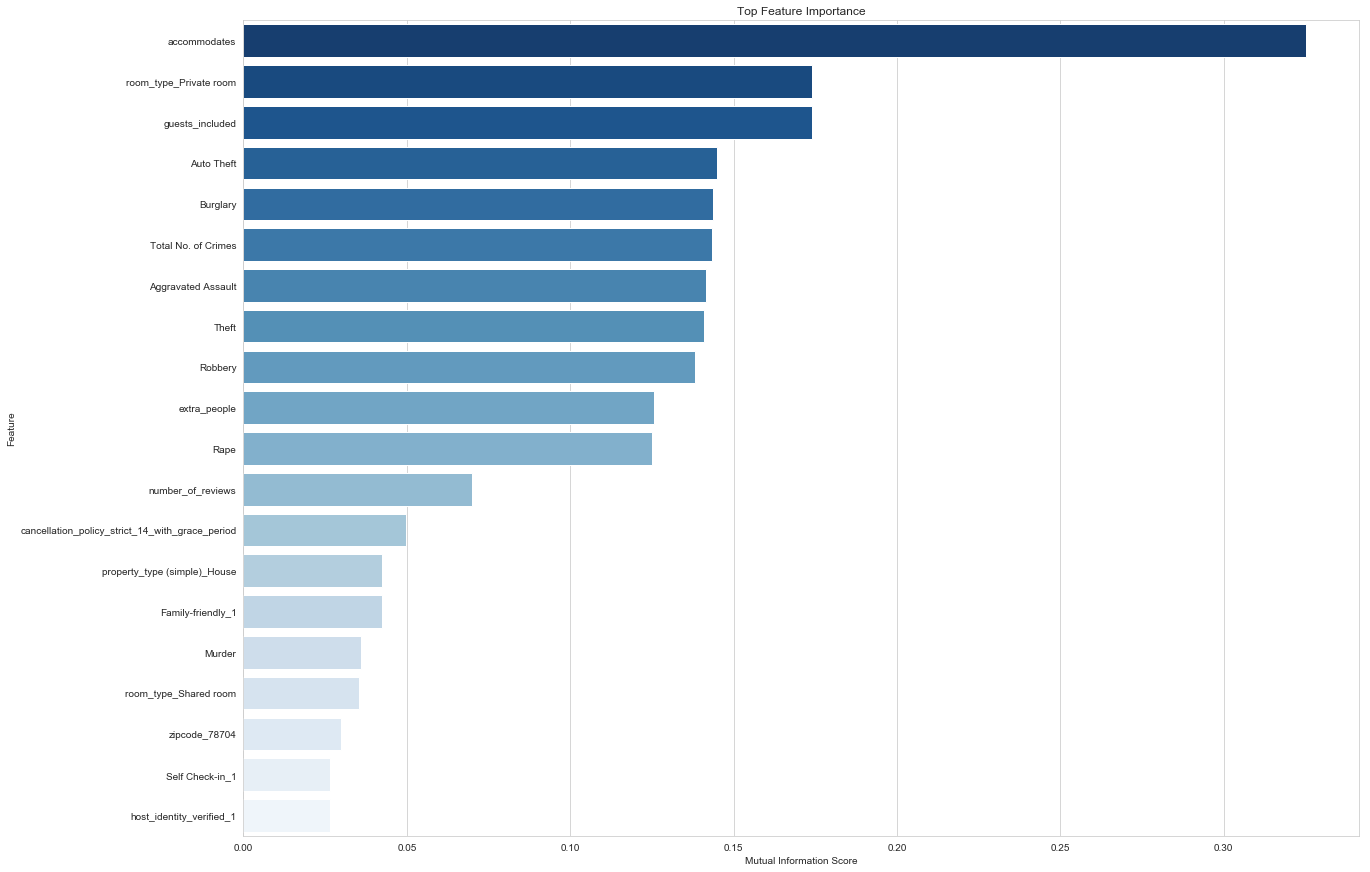

In [115]:
top_features = np.array(feature_scores[:20])

f, axes = plt.subplots(figsize=(20,15))
ax = sns.barplot(x=[float(i) for i in top_features[:,1]], \
                 y=top_features[:,0], \
                 palette = "Blues_r")
ax.set(title="Top Feature Importance", xlabel="Mutual Information Score", \
       ylabel="Feature")
plt.show()

In Machine Learning, features that explain the prediction can be said to be strong variables in our model. Features that by themselves do not provide insight to the prediction are said to be noisy features.

Below, the `R2` scores are taken using the best parameters for our best estimator on the top *N* features.

In [99]:
kbestscores = []

for rank in [10, 25, 50, 60, 70, 80, 90]:
    kbest = SelectKBest(score_func=mutual_info_regression, \
                        k=rank)
    kbest.fit(X, y)
    X_new = kbest.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

    gbr = GradientBoostingRegressor(random_state=42, \
                                    loss="huber", \
                                    n_estimators=500, \
                                    max_depth=3)
    gbr.fit(X_train, np.ravel(y_train))

    gbr_score = gbr.score(X_train, y_train)*100
    kbestscores.append((rank, gbr_score))

for item in kbestscores:
    print("Score with Only the Top %d Features: %.2f%%" \
          % (item[0], item[1]))

Score with Only the Top 10 Features: 60.21%
Score with Only the Top 25 Features: 70.52%
Score with Only the Top 50 Features: 72.35%
Score with Only the Top 60 Features: 72.57%
Score with Only the Top 70 Features: 72.34%
Score with Only the Top 80 Features: 72.44%
Score with Only the Top 90 Features: 72.55%


Though the gain from using beyond the top 25 features is minute, it appears that the best score is achieved when we make use of 60 of the 93 features. The top 10 features already *explain* ~60% of the target variable, so that gain of 10% tells us that each of those other 50 variables weakly predict the outcome on its own. But the combination of all makes for a better performing model than if we simplified with just ten or so features.

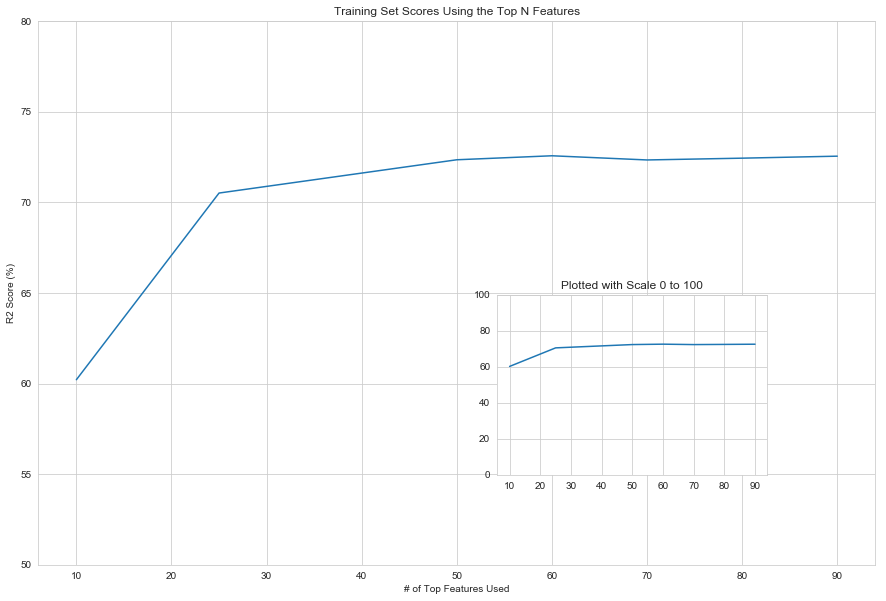

In [100]:
kbestscores = np.array(kbestscores)
rank = kbestscores[:,0]
gbr_score = kbestscores[:,1]

f, axes = plt.subplots(figsize=(15,10))
ax = sns.lineplot(rank, gbr_score)
ax.set(title="Training Set Scores Using the Top N Features", \
       xlabel="# of Top Features Used", \
       ylabel="R2 Score (%)")
ax.set_ylim([50, 80])

ax2 = f.add_axes([0.55, 0.25, 0.25, 0.25])
ax2 = sns.lineplot(rank, gbr_score)
ax2.set(title="Plotted with Scale 0 to 100")
ax2.set_ylim([0, 100])
plt.show()

### Final Result ###
We've not only selected the best estimator for our model, we've also explored and identified the best parameters to use. And on top of this, we have performed feature selection to deduce which top features would produce the optimal accuracy. But of course our final model only yielded the results we've observed on the *training* set. Now it's time to implement our model to the hold-out set that was set aside early on. Our final scores are below. There is quite a delta between the training and test scores, though this is common in the real world.

In [101]:
best_feat_count = max(kbestscores, key=lambda x:x[1])
best_feat_count = int(best_feat_count[0])

kbest = SelectKBest(score_func=mutual_info_regression, \
                    k=best_feat_count)
kbest.fit(X, y)
X_new = kbest.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(random_state=42, \
                                loss="huber", \
                                n_estimators=500, \
                                max_depth=3)
gbr.fit(X_train, np.ravel(y_train))

train_score = gbr.score(X_train, y_train)*100
test_score = gbr.score(X_test, y_test)*100

print("Training set score: %.2f%%" % train_score)
print("Hold-Out set score: %.2f%%" % test_score)

Training set score: 72.25%
Hold-Out set score: 66.62%
